# TASK 6.5 UNSUPERVISED MACHINE LEARNING: CLUSTERING

**This script contains the following sections:**

    1. Install and import all necessary libraries in your Jupyter notebook.

    2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming). Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data. Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

    3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

    4. Explain why you chose that number in a markdown cell. If you run into any problems determining the optimal number of         clusters using the elbow technique, reach out to your tutor for suggestions.

    5. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to           create a visualization using your clusters.

    6. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different 
    variables against each other to see the results in terms of the clusters.
    
    7. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it
    means you’ll need to explore the data further.  Note down your thoughts in a markdown cell.

    8. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

    9. Propose what these results could be useful for in future steps of an analytics pipeline.

**1. Install and import all necessary libraries in your Jupyter notebook.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans #k-means algorithm from scikit-learn.
import pylab as pl #pyLab is a convenience module that bulk imports matplotlib.

**2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming). Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data. Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.**

In [2]:
#define path
path = r'C:\Users\ddgal\OneDrive\Desktop\Career Foundry Tasks\Data Immersion\Achievement 6'

In [3]:
#import data as df
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'cust_churn_records_var.csv'), index_col=0)

In [4]:
#check shape (10000 rows, and 22 columns)
df.shape

(10000, 22)

In [5]:
#display all columns
pd.set_option('display.max_columns', None)

In [6]:
#check df for categorical variables
df.head()

,Customer_id,Credit_score,Geography,Gender,Age,Tenure,Balance,Number_of_products,Has_credit_card,Is_active_member,Estimated_salary,Exited,Complain,Satisfaction_score,Card_type,Points_earned,Credit_profile,Age_profile,Balance_profile,Tenure_profile,Salary_profile,Points_profile
RowNumber,,,,,,,,,,,,,,,,,,,,,,
1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,Fair credit ccore,Middle aged,No balance,Low Tenure,Middle class,Middle points
2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Fair credit ccore,Middle aged,Low balance,Low Tenure,Middle class,Middle points
3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,Poor credit score,Middle aged,High balance,High Tenure,Middle class,Low points
4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,Fair credit ccore,Young adult,No balance,Low Tenure,Middle class,Low points
5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,Excellent credit score,Middle aged,Medium balance,Low Tenure,Middle class,Middle points


In [7]:
#create subset of df elimnating categorical variables and Customer_id 
df_sub = df[['Credit_score', 'Age', 'Tenure', 'Balance', 'Number_of_products', 'Has_credit_card', 'Is_active_member', 'Estimated_salary', 'Exited', 'Complain', 'Satisfaction_score', 'Points_earned']]

In [8]:
#check df_sub
df_sub.head()

,Credit_score,Age,Tenure,Balance,Number_of_products,Has_credit_card,Is_active_member,Estimated_salary,Exited,Complain,Satisfaction_score,Points_earned
RowNumber,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
2,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
3,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
4,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
5,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425


**3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.**

In [9]:
#defines potential range of clusters
num_cl = range(1, 10)

#defines k-means clusters in range assigned above
kmeans = [KMeans(n_clusters=i, n_init=10) for i in num_cl]

In [10]:
#creates score which represents rate of variation for the cluster
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))] 
score

[-72002333701280.34,
 -38363037395904.67,
 -22817647108686.938,
 -13691067472995.5,
 -10842009501062.686,
 -9026242315637.816,
 -7683422666919.663,
 -6579642594893.728,
 -5732319447978.272]

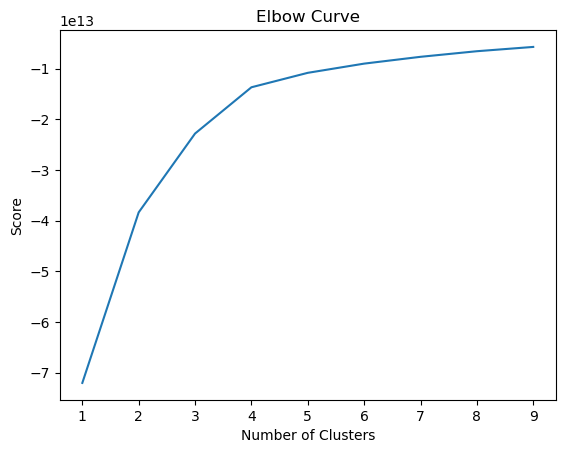

In [11]:
#plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**4. Explain why you chose that number in a markdown cell. If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.**

There is a large jump from two to four and then it levels off, this indicates that the optimum number of clusters is four for my data set.

**5. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.**

In [12]:
#create the k-means object
kmeans = KMeans(n_clusters = 4, n_init=10)

In [13]:
#fit the k-means object to the data.
kmeans.fit(df_sub)

KMeans(n_clusters=4, n_init=10)

In [14]:
#create 'Clusters' column, showing the nubmer of clusters
df_sub['Clusters'] = kmeans.fit_predict(df_sub)
df_sub.head()

C:\Users\ddgal\AppData\Local\Temp\ipykernel_8416\3619680523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['Clusters'] = kmeans.fit_predict(df_sub)


,Credit_score,Age,Tenure,Balance,Number_of_products,Has_credit_card,Is_active_member,Estimated_salary,Exited,Complain,Satisfaction_score,Points_earned,Clusters
RowNumber,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,2
2,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,1
3,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,1
4,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,3


In [16]:
#check count of 'Clusters column'
df_sub['Clusters'].value_counts(dropna=False)

1    3131
3    3066
0    1912
2    1891
Name: Clusters, dtype: int64

**6. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different 
variables against each other to see the results in terms of the clusters.**

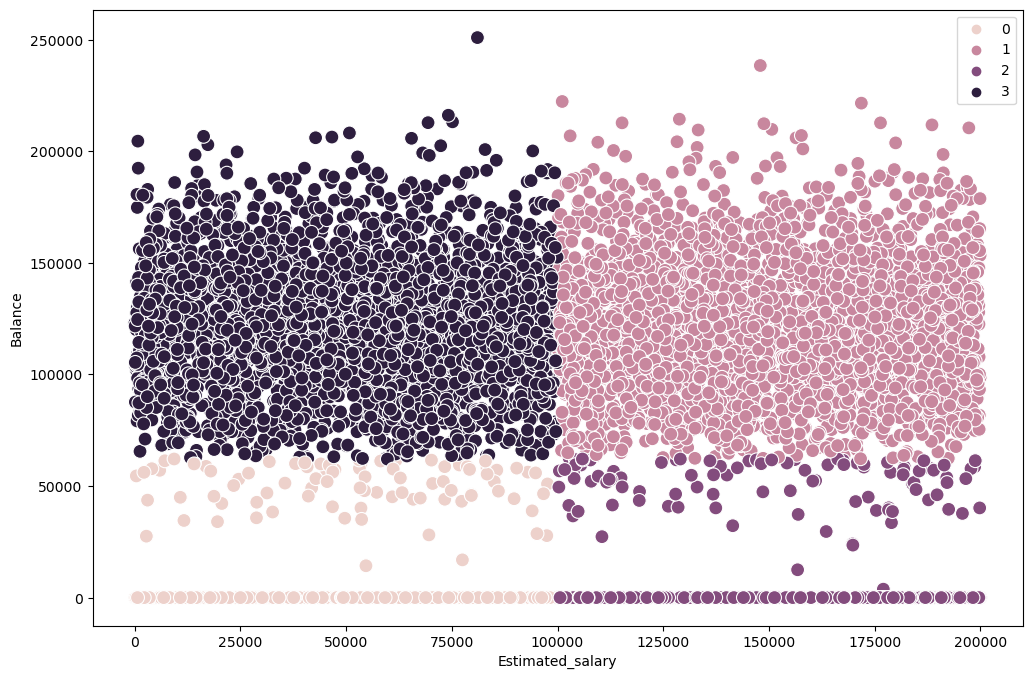

In [24]:
#plot the clusters for the Estimated_salary and Balance.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Estimated_salary'], y=df_sub['Balance'], hue=kmeans.labels_, s=100) 
 
#hue takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
#s represents the size of the points you want to see in the plot.

plt.xlabel('Estimated_salary') #label x-axis.
plt.ylabel('Balance') #label y-axis.
plt.show()

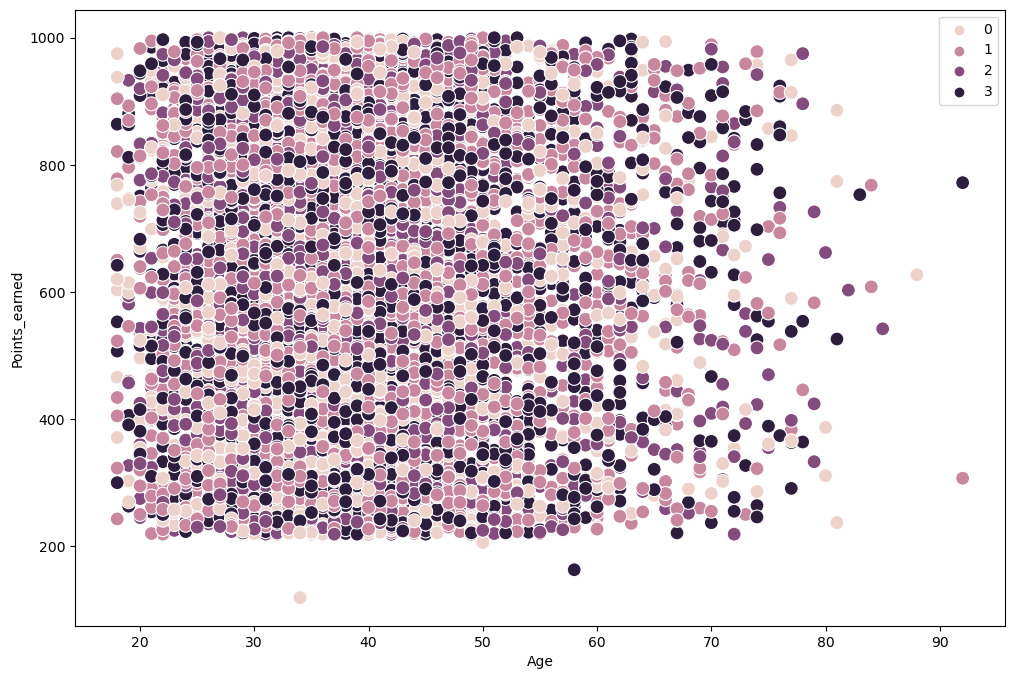

In [31]:
#plot the clusters for the Age and Points_earned

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Age'], y=df_sub['Points_earned'], hue=kmeans.labels_, s=100) 
 
#hue takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
#s represents the size of the points you want to see in the plot.

plt.xlabel('Age') #label x-axis.
plt.ylabel('Points_earned') #label y-axis.
plt.show()

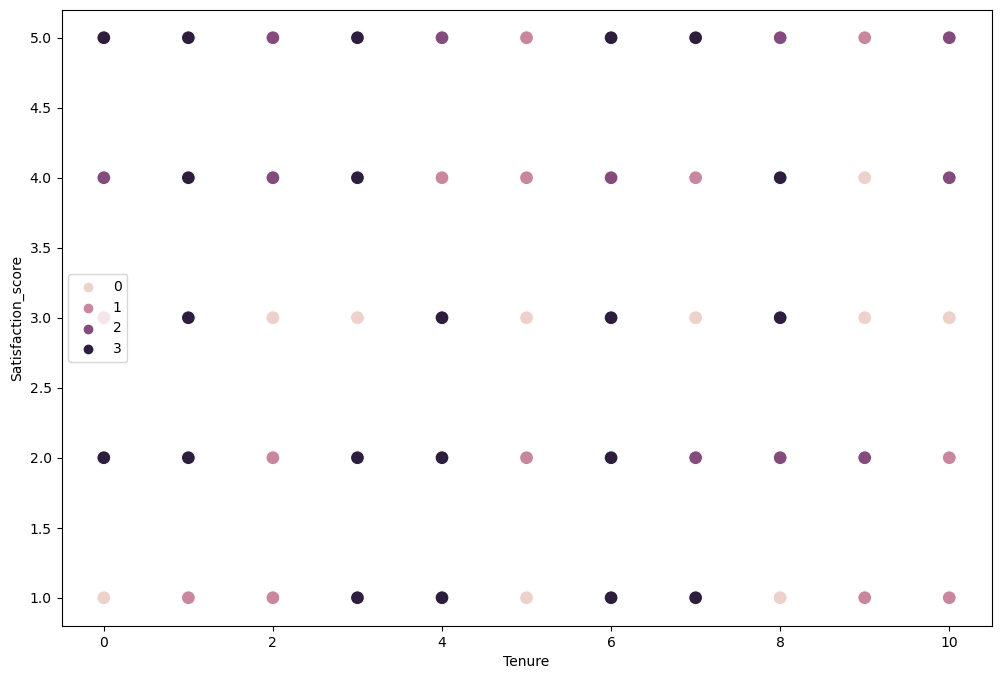

In [33]:
#plot the clusters for the Age and Points_earned

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Tenure'], y=df_sub['Satisfaction_score'], hue=kmeans.labels_, s=100) 
 
#hue takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
#s represents the size of the points you want to see in the plot.

plt.xlabel('Tenure') #label x-axis.
plt.ylabel('Satisfaction_score') #label y-axis.
plt.show()

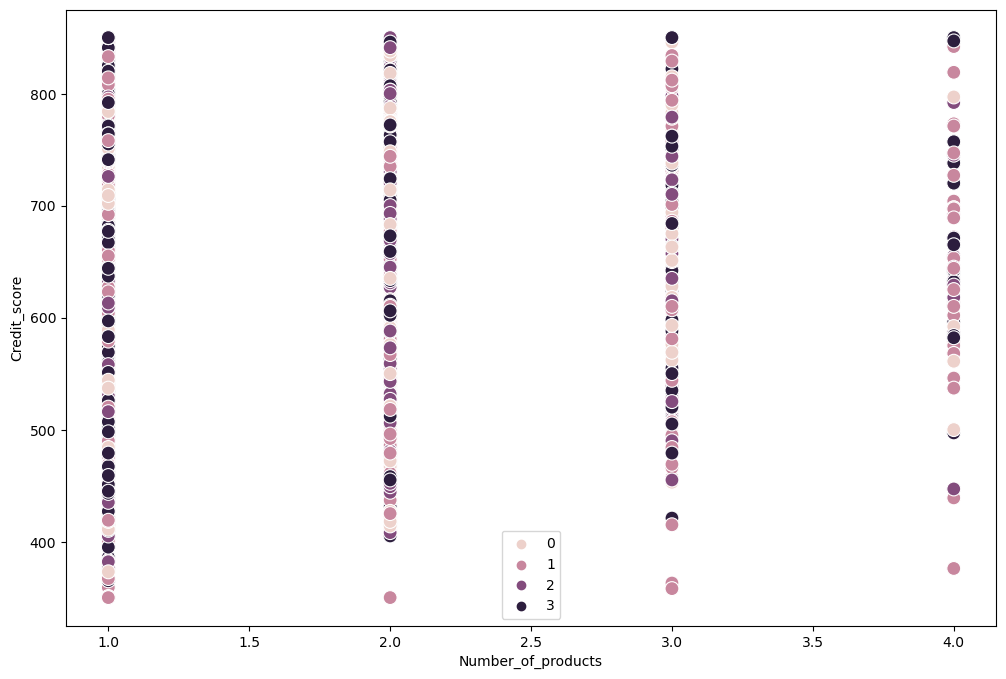

In [37]:
#plot the clusters for the Age and Points_earned

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Number_of_products'], y=df_sub['Credit_score'], hue=kmeans.labels_, s=100) 
 
#hue takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
#s represents the size of the points you want to see in the plot.

plt.xlabel('Number_of_products') #label x-axis.
plt.ylabel('Credit_score') #label y-axis.
plt.show()

**7. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it
means you’ll need to explore the data further.  Note down your thoughts in a markdown cell.**

So the only cluster diagram that we can retrieve any insights from is the first one plotting Balance against Estimated_salary.  First, it tells us that most people in these categories fall into clusters one and three and these customers all have a Balance over 50000. The problem with this data set and doing this kind of unsupervised machine learning, is we have many binary variables and we also have many variables without many observations such as Tenure and Satisfaction_score; this limits the amount of insights we can retrieve with this kind of analysis.

**8. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.**

In [41]:
df_sub.groupby('Clusters').agg({'Credit_score':['mean', 'median'], 
                         'Age':['mean', 'median'], 
                         'Tenure':['mean', 'median'],
                         'Balance':['mean', 'median'],
                         'Number_of_products':['mean', 'median'],
                         'Estimated_salary':['mean', 'median'],
                         'Satisfaction_score':['mean', 'median'],
                         'Points_earned':['mean', 'median']})

Credit_score               Age           Tenure         \
                 mean median       mean median      mean median   
Clusters                                                          
0          650.080021  651.0  38.530858   37.0  5.054916    5.0   
1          650.828489  652.0  38.988183   37.0  5.002555    5.0   
2          648.706504  651.0  38.423057   37.0  5.069804    5.0   
3          651.626549  653.0  39.405414   38.0  4.961840    5.0   

                Balance            Number_of_products        Estimated_salary  \
                   mean     median               mean median             mean   
Clusters                                                                        
0           2293.096313       0.00           1.770921    2.0     49750.219179   
1         121953.442609  120875.23           1.402108    1.0    149744.909055   
2           2619.445812       0.00           1.762031    2.0    149222.657758   
3         121880.264804  121168.54           1.367906    1.0     50472.479997   

                     Satisfaction_score        Points_earned         
              median               mean median          mean median  
Clusters                                                             
0          50048.835           3.021967    3.0    607.305439  602.0  
1         149139.130           2.998084    3.0    611.972852  615.0  
2         149184.150           2.993654    3.0    597.984135  589.0  
3          50992.930           3.037182    3.0    605.710372  607.0

This does not really tell me anything useful.  Everything is as expected, of course the column Balance seems to be off since clusters 0 and 2 have medians of 0, however, I already know from the histograms that the vast majority of the customers on this data set have a Balance of 0.  There is also no point in calculating statistics for the binary variables.

**9. Propose what these results could be useful for in future steps of an analytics pipeline.**

The cluster part of this exercise is particularly useful in determining how to categorize your variables.  In my case the ideal number of clusters is four.  I did alot of categorizing in lesson 6.2 where I used four categories for some variables and three for others.  There are one or two more additional variables I would like to categorize such as Satisfaction_score; for this variable I will try to categorize it into four if it makes sense so that it aligns with what I learned in this exercise.  The scatterplots would be useful with a data set that has quantitative variables with lots of variances.  In my case, I have alot binary and/or variables such as Tenure and Number_of_products that have very little observations.   